# Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#scaling:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split

# --------Linear Regression
from sklearn.linear_model import LinearRegression
# --------  metrics:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import make_scorer
#---------Text:
import re

## My Functions:

#### Data preparation functions:

In [2]:
def encode_categorical(df, columns_to_encode=None):
    labelencoder=LabelEncoder()
    if columns_to_encode == None:
        for col in df.select_dtypes(exclude='number').columns:
            df[col] = labelencoder.fit_transform(df[col]).copy()
    else:
        for col in columns_to_encode:
            df[col] = labelencoder.fit_transform(df[col]).copy()
    return df


In [3]:
def scale(df, scaler_kind=None, cols_to_scale=None):
    if scaler_kind == 'StandardScaler':
        if cols_to_scale == None:
            for col in df.columns:
                df[col] = StandardScaler().fit_transform(np.array(df[col]).reshape(-1,1))
        else:
            for col in cols_to_scale:
                df[col] = StandardScaler().fit_transform(np.array(df[col]).reshape(-1,1))
    elif scaler_kind == 'MinMaxScaler':
        if cols_to_scale == None:
            for col in df.columns:
                df[col] = MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))
        else:
            for col in cols_to_scale:
                df[col] = MinMaxScaler().fit_transform(np.array(df[col]).reshape(-1,1))
    else:
        print("scaler_kind is missing!!!")
    return df

   #### prediction functions:

In [4]:
def train_linear_model(X_train, y_train):
    trained_model = linear_model.LinearRegression().fit(X_train, y_train)
    return trained_model

In [5]:
def predict_linear(trained_1st_model, X_test):
    predicted_vals = trained_1st_model.predict(X_test)
    return predicted_vals

In [6]:
def evaluate_performance_linear(y_test,y_predicted):
    evaluate_value = r2_score(y_test,y_predicted)
    return evaluate_value

# Data Import

In [7]:
df_org = pd.read_csv("New_wine_file.csv")
df_org.head()

,Name,Price,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Wine link,Winemaker Notes,Critical Acclaim,Num of Critics,Avg. Critics rating,Wine Kind
0,Chateau de Landiras 2018,19.98,Bordeaux Red Blends,"Graves, Bordeaux, France",3.7,227.0,750.0,13.0,https://www.wine.com/product/chateau-de-landir...,"Blend: 75% Merlot, 25% Cabernet Sauvignon","Grand generosity, showcasing deep, vigorous da...",1.0,95.0,red
1,Livio Sassetti Brunello di Montalcino Pertimal...,89.99,Sangiovese,"Montalcino, Tuscany, Italy",3.6,7.0,750.0,0.0,https://www.wine.com/product/livio-sassetti-br...,Intense ruby red with fruit aromas ripe red wi...,"Blackberries, black walnuts and black cherries...",5.0,96.6,red
2,Silver Oak Alexander Valley Cabernet Sauvignon...,89.99,Cabernet Sauvignon,"Alexander Valley, Sonoma County, California",4.4,196.0,750.0,14.2,https://www.wine.com/product/silver-oak-alexan...,The 2017 Alexander Valley Cabernet Sauvignon i...,COMMENTARY: The 2017 Silver Oak Alexander Vall...,1.0,93.0,red
3,Duckhorn Napa Valley Cabernet Sauvignon 2019,69.99,Cabernet Sauvignon,"Napa Valley, California",4.1,18.0,750.0,14.5,https://www.wine.com/product/duckhorn-napa-val...,"Beautifully rich and complex, this wine offers...",COMMENTARY: The 2019 Duckhorn Vineyards Cabern...,1.0,92.0,red
4,Beaulieu Vineyard Georges de Latour Private Re...,129.99,Cabernet Sauvignon,"Napa Valley, California",4.3,30.0,750.0,14.5,https://www.wine.com/product/beaulieu-vineyard...,The 2018 Georges de Latour Private Reserve Cab...,"Blackberry, blackcurrant and mint with some sa...",5.0,97.2,red


In [8]:
df_org.describe()

,Price,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating
count,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000,12357.000000
mean,90.764028,1.411864,14.020474,777.534272,9.011737,1.880715,91.885263
std,250.925807,1.933965,56.083253,307.045259,6.310796,1.277598,2.200057
min,3.990000,0.000000,0.000000,0.000000,0.000000,1.000000,56.000000
25%,19.990000,0.000000,0.000000,750.000000,0.000000,1.000000,90.000000
50%,35.490000,0.000000,0.000000,750.000000,12.500000,1.000000,91.500000
75%,77.990000,3.800000,9.000000,750.000000,13.700000,2.000000,93.000000
max,13999.970000,5.000000,1631.000000,9000.000000,84.000000,10.000000,100.000000


##  Basic data Exploration and Cleaning

In [9]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12360 entries, 0 to 12359
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 12357 non-null  object 
 1   Price                12357 non-null  float64
 2   Grape Sort           12357 non-null  object 
 3   Place                12091 non-null  object 
 4   Avg Rating           12357 non-null  float64
 5   Ratings              12357 non-null  float64
 6   Product Volume       12357 non-null  float64
 7   Alcohol %            12357 non-null  float64
 8   Wine link            12357 non-null  object 
 9   Winemaker Notes      11406 non-null  object 
 10  Critical Acclaim     11708 non-null  object 
 11  Num of Critics       12357 non-null  float64
 12  Avg. Critics rating  12357 non-null  float64
 13  Wine Kind            12357 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.3+ MB


In [10]:
df_org.shape

(12360, 14)

### Remove duplicative and missing rows

In [11]:
df_org.duplicated().sum()

543

In [12]:
df_rem_dup = df_org.drop_duplicates(keep='first').copy()
df_rem_dup.dropna(inplace=True)
df_rem_dup.reset_index(inplace=True,drop=True)
df_rem_dup.duplicated().sum()

0

In [13]:
df_rem_dup.shape

(10147, 14)

### Extract Year from wine name

In [14]:
pattern = "\d\d\d\d"
df_rem_dup['Year'] = None
for row in range(len(df_rem_dup)):
    if re.search(pattern,df_rem_dup['Name'][row]) != None:
        df_rem_dup.at[row,'Year'] = int(re.search(pattern,df_rem_dup['Name'][row]).group(0))
    else:
        if re.search(pattern,df_rem_dup['Winemaker Notes'][row]) != None:
            df_rem_dup.at[row,'Year'] = int(re.search(pattern,df_rem_dup['Winemaker Notes'][row]).group(0))
        else:
            df_rem_dup.at[row,'Year'] = np.nan

### Find corrupt and missing values

In [15]:
df_rem_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10147 entries, 0 to 10146
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 10147 non-null  object 
 1   Price                10147 non-null  float64
 2   Grape Sort           10147 non-null  object 
 3   Place                10147 non-null  object 
 4   Avg Rating           10147 non-null  float64
 5   Ratings              10147 non-null  float64
 6   Product Volume       10147 non-null  float64
 7   Alcohol %            10147 non-null  float64
 8   Wine link            10147 non-null  object 
 9   Winemaker Notes      10147 non-null  object 
 10  Critical Acclaim     10147 non-null  object 
 11  Num of Critics       10147 non-null  float64
 12  Avg. Critics rating  10147 non-null  float64
 13  Wine Kind            10147 non-null  object 
 14  Year                 9434 non-null   object 
dtypes: float64(7), object(8)
memory usag

In [16]:
df_rem_dup.dropna().info()
#df_rem_dup[df_rem_dup['Ratings']==0.0].count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9434 entries, 0 to 10146
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Name                 9434 non-null   object 
 1   Price                9434 non-null   float64
 2   Grape Sort           9434 non-null   object 
 3   Place                9434 non-null   object 
 4   Avg Rating           9434 non-null   float64
 5   Ratings              9434 non-null   float64
 6   Product Volume       9434 non-null   float64
 7   Alcohol %            9434 non-null   float64
 8   Wine link            9434 non-null   object 
 9   Winemaker Notes      9434 non-null   object 
 10  Critical Acclaim     9434 non-null   object 
 11  Num of Critics       9434 non-null   float64
 12  Avg. Critics rating  9434 non-null   float64
 13  Wine Kind            9434 non-null   object 
 14  Year                 9434 non-null   object 
dtypes: float64(7), object(8)
memory usage

## Remove not categorical and not numerical columns:

In [17]:
df_cat_num = df_rem_dup.drop(['Name','Winemaker Notes','Critical Acclaim','Wine link'],axis=1).copy()
df_cat_num.head()

,Price,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year
0,19.98,Bordeaux Red Blends,"Graves, Bordeaux, France",3.7,227.0,750.0,13.0,1.0,95.0,red,2018
1,89.99,Sangiovese,"Montalcino, Tuscany, Italy",3.6,7.0,750.0,0.0,5.0,96.6,red,2016
2,89.99,Cabernet Sauvignon,"Alexander Valley, Sonoma County, California",4.4,196.0,750.0,14.2,1.0,93.0,red,2017
3,69.99,Cabernet Sauvignon,"Napa Valley, California",4.1,18.0,750.0,14.5,1.0,92.0,red,2019
4,129.99,Cabernet Sauvignon,"Napa Valley, California",4.3,30.0,750.0,14.5,5.0,97.2,red,2018


#### Remove rows with missing ratings and alcohol %:

In [18]:
df_cat_num.loc[df_rem_dup['Ratings']==0.0,'Ratings'] = np.nan
df_cat_num.loc[df_rem_dup['Avg Rating']==0.0,'Avg Rating'] = np.nan
df_cat_num.loc[df_rem_dup['Alcohol %']==0.0,'Alcohol %'] = np.nan

#df_rem_dup['Ratings'][df_rem_dup['Ratings']==0.0] = np.nan
#df_rem_dup['Avg Rating'][df_rem_dup['Avg Rating']==0.0] = np.nan

In [19]:
df_rem_zero_ratings = df_cat_num.dropna().copy()

In [20]:
df_rem_zero_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977 entries, 0 to 10145
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2977 non-null   float64
 1   Grape Sort           2977 non-null   object 
 2   Place                2977 non-null   object 
 3   Avg Rating           2977 non-null   float64
 4   Ratings              2977 non-null   float64
 5   Product Volume       2977 non-null   float64
 6   Alcohol %            2977 non-null   float64
 7   Num of Critics       2977 non-null   float64
 8   Avg. Critics rating  2977 non-null   float64
 9   Wine Kind            2977 non-null   object 
 10  Year                 2977 non-null   object 
dtypes: float64(7), object(4)
memory usage: 279.1+ KB


### Convert types:

In [21]:
df_rem_zero_ratings['Year'] = df_rem_zero_ratings['Year'].astype(int)
df_rem_zero_ratings['Num of Critics'] = df_rem_zero_ratings['Num of Critics'].astype(int)
df_rem_zero_ratings['Product Volume'] = df_rem_zero_ratings['Product Volume'].astype(int)

In [22]:
df_rem_zero_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977 entries, 0 to 10145
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2977 non-null   float64
 1   Grape Sort           2977 non-null   object 
 2   Place                2977 non-null   object 
 3   Avg Rating           2977 non-null   float64
 4   Ratings              2977 non-null   float64
 5   Product Volume       2977 non-null   int32  
 6   Alcohol %            2977 non-null   float64
 7   Num of Critics       2977 non-null   int32  
 8   Avg. Critics rating  2977 non-null   float64
 9   Wine Kind            2977 non-null   object 
 10  Year                 2977 non-null   int32  
dtypes: float64(5), int32(3), object(3)
memory usage: 244.2+ KB


#### Avg Rating filling

#to do
max_Avg_Rating = df_rem_zero_ratings['Avg Rating'].max()
max_Avg_Critics_rating = df_rem_zero_ratings['Avg. Critics rating'].max()
min_Avg_Critics_rating = df_rem_zero_ratings['Avg. Critics rating'].min()
Avg_Critics_rating_Range = max_Avg_Critics_rating-min_Avg_Critics_rating

print(max_Avg_Rating)
print(max_Avg_Critics_rating)
print(min_Avg_Critics_rating)

#df_rem_zero_ratings.head()

#df_rem_zero_ratings['Avg Rating'].fillna()

#df_rem_zero_ratings[df_rem_zero_ratings['Avg Rating'].isna()]
#df_rem_zero_ratings[df_rem_zero_ratings['Avg. Critics rating']==df_rem_zero_ratings['Avg. Critics rating'].max()]

### Encoding categorical features:

In [23]:
df_rem_zero_ratings.head()

,Price,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year
0,19.98,Bordeaux Red Blends,"Graves, Bordeaux, France",3.7,227.0,750,13.0,1,95.000000,red,2018
2,89.99,Cabernet Sauvignon,"Alexander Valley, Sonoma County, California",4.4,196.0,750,14.2,1,93.000000,red,2017
3,69.99,Cabernet Sauvignon,"Napa Valley, California",4.1,18.0,750,14.5,1,92.000000,red,2019
4,129.99,Cabernet Sauvignon,"Napa Valley, California",4.3,30.0,750,14.5,5,97.200000,red,2018
5,184.99,Bordeaux Red Blends,"Pauillac, Bordeaux, France",4.4,101.0,750,13.5,6,97.666667,red,2016


In [24]:
df_encoded = encode_categorical(df_rem_zero_ratings)

In [25]:
df_encoded.head()

,Price,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year
0,19.98,10,113,3.7,227.0,750,13.0,1,95.000000,0,2018
2,89.99,13,7,4.4,196.0,750,14.2,1,93.000000,0,2017
3,69.99,13,180,4.1,18.0,750,14.5,1,92.000000,0,2019
4,129.99,13,180,4.3,30.0,750,14.5,5,97.200000,0,2018
5,184.99,10,193,4.4,101.0,750,13.5,6,97.666667,0,2016


In [26]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977 entries, 0 to 10145
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2977 non-null   float64
 1   Grape Sort           2977 non-null   int32  
 2   Place                2977 non-null   int32  
 3   Avg Rating           2977 non-null   float64
 4   Ratings              2977 non-null   float64
 5   Product Volume       2977 non-null   int32  
 6   Alcohol %            2977 non-null   float64
 7   Num of Critics       2977 non-null   int32  
 8   Avg. Critics rating  2977 non-null   float64
 9   Wine Kind            2977 non-null   int32  
 10  Year                 2977 non-null   int32  
dtypes: float64(5), int32(6)
memory usage: 209.3 KB


# Visualisation

In [27]:
df_encoded.corr()
#['Grape Sort','Place','Ratings','Wine Kind']

,Price,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year
Price,1.000000,-0.019663,-0.063939,0.356767,-0.069718,0.142748,-0.015223,0.493341,0.613951,-0.080020,-0.033392
Grape Sort,-0.019663,1.000000,-0.080340,0.011856,-0.022399,0.003875,-0.320096,-0.104865,-0.074528,-0.000269,-0.020909
Place,-0.063939,-0.080340,1.000000,0.006624,-0.006361,-0.033523,0.140527,-0.023890,-0.000587,-0.049182,-0.025773
Avg Rating,0.356767,0.011856,0.006624,1.000000,0.000808,0.060257,-0.029579,0.284958,0.284808,-0.023009,-0.005125
Ratings,-0.069718,-0.022399,-0.006361,0.000808,1.000000,-0.012404,-0.000597,0.045992,-0.038116,-0.016130,-0.010702
Product Volume,0.142748,0.003875,-0.033523,0.060257,-0.012404,1.000000,-0.029751,0.073574,0.014178,-0.000819,0.024800
Alcohol %,-0.015223,-0.320096,0.140527,-0.029579,-0.000597,-0.029751,1.000000,0.071328,0.071678,-0.390849,0.054953
Num of Critics,0.493341,-0.104865,-0.023890,0.284958,0.045992,0.073574,0.071328,1.000000,0.549539,-0.073549,-0.063360
Avg. Critics rating,0.613951,-0.074528,-0.000587,0.284808,-0.038116,0.014178,0.071678,0.549539,1.000000,-0.142818,-0.020870
Wine Kind,-0.080020,-0.000269,-0.049182,-0.023009,-0.016130,-0.000819,-0.390849,-0.073549,-0.142818,1.000000,-0.016640


<AxesSubplot:>

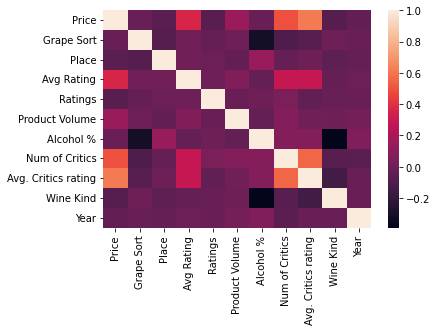

In [28]:
sns.heatmap(df_encoded.corr())

<AxesSubplot:xlabel='Avg. Critics rating', ylabel='Price'>

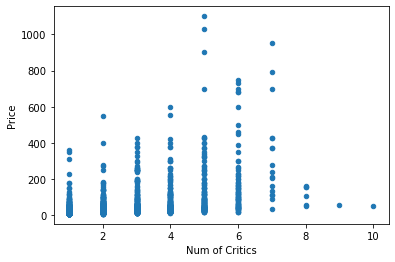

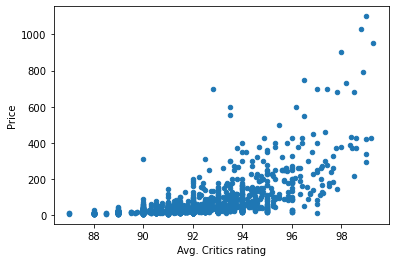

In [29]:
df_encoded.plot.scatter(x='Num of Critics', y='Price')
df_encoded.plot.scatter(x='Avg. Critics rating', y='Price')

##### improve prediction:

In [30]:
df_encoded.head()

,Price,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year
0,19.98,10,113,3.7,227.0,750,13.0,1,95.000000,0,2018
2,89.99,13,7,4.4,196.0,750,14.2,1,93.000000,0,2017
3,69.99,13,180,4.1,18.0,750,14.5,1,92.000000,0,2019
4,129.99,13,180,4.3,30.0,750,14.5,5,97.200000,0,2018
5,184.99,10,193,4.4,101.0,750,13.5,6,97.666667,0,2016


In [31]:
df_encoded = encode_categorical(df_encoded,columns_to_encode=['Ratings','Alcohol %','Num of Critics','Avg. Critics rating','Year'])

In [32]:
df_encoded["critics_ratings"]=df_encoded['Num of Critics']*df_encoded['Avg. Critics rating']
df_encoded.head()

,Price,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year,critics_ratings
0,19.98,10,113,3.7,177,750,45,0,69,0,44,0
2,89.99,13,7,4.4,166,750,67,0,40,0,43,0
3,69.99,13,180,4.1,13,750,73,0,27,0,45,0
4,129.99,13,180,4.3,25,750,73,4,96,0,44,384
5,184.99,10,193,4.4,96,750,56,5,102,0,42,510


In [33]:
#drop columns with low corr.:
#['Grape Sort','Place','Ratings','Wine Kind']
#df_encoded.drop(['Num of Critics','Avg. Critics rating'],inplace=True,axis=1)
#df_encoded.head()

# Prediction:

In [44]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2977 entries, 0 to 10145
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                2977 non-null   float64
 1   Grape Sort           2977 non-null   int32  
 2   Place                2977 non-null   int32  
 3   Avg Rating           2977 non-null   float64
 4   Ratings              2977 non-null   int64  
 5   Product Volume       2977 non-null   int32  
 6   Alcohol %            2977 non-null   int64  
 7   Num of Critics       2977 non-null   int64  
 8   Avg. Critics rating  2977 non-null   int64  
 9   Wine Kind            2977 non-null   int32  
 10  Year                 2977 non-null   int64  
 11  critics_ratings      2977 non-null   int64  
dtypes: float64(2), int32(4), int64(6)
memory usage: 255.8 KB


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.drop(["Price"],axis=1),df_encoded["Price"],random_state=42)

In [35]:
X_train.head()

,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year,critics_ratings
1850,50,89,3.9,24,750,45,0,15,0,44,0
9054,67,2,4.1,3,750,52,0,40,1,45,0
8993,67,170,3.9,44,750,45,0,3,1,45,0
3967,66,179,3.9,17,750,16,1,21,3,45,21
5449,69,226,4.2,34,750,64,1,21,3,44,21


In [36]:
X_train = scale(X_train,scaler_kind='StandardScaler')
X_train.head()

,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year,critics_ratings
1850,0.018400,-0.695603,-0.206065,-0.069223,-0.023748,-0.471284,-0.726644,-0.422818,-1.128118,0.332225,-0.460538
9054,0.685869,-1.701951,0.276555,-0.570246,-0.023748,-0.088255,-0.726644,0.808691,-0.354789,0.556387,-0.460538
8993,0.685869,0.241341,-0.206065,0.407942,-0.023748,-0.471284,-0.726644,-1.013942,-0.354789,0.556387,-0.460538
3967,0.646606,0.345446,-0.206065,-0.236231,-0.023748,-2.058117,0.010234,-0.127256,1.191869,0.556387,-0.209107
5449,0.764395,0.889105,0.517865,0.169359,-0.023748,0.568365,0.010234,-0.127256,1.191869,0.332225,-0.209107


In [37]:
X_test = scale(X_test,scaler_kind='StandardScaler')
X_test

,Grape Sort,Place,Avg Rating,Ratings,Product Volume,Alcohol %,Num of Critics,Avg. Critics rating,Wine Kind,Year,critics_ratings
8412,0.824677,-1.091494,1.378251,-0.524185,0.0,-1.518621,0.614698,2.367326,0.482419,-0.842076,1.148443
9670,0.665210,-0.246703,1.134992,-0.625460,0.0,-0.987236,-0.736187,-0.446776,-0.297195,0.525544,-0.476528
5551,-1.567319,-0.385573,-0.081304,-0.321634,0.0,-0.455850,1.965583,-0.216112,1.262032,0.134795,0.378720
3561,0.744943,0.459217,0.405214,-0.574823,0.0,0.713198,-0.736187,-0.815839,1.262032,0.916292,-0.476528
2499,0.545610,-1.068349,-0.324563,-0.270997,0.0,1.032029,-0.060745,-0.677440,-1.076809,0.330169,-0.369622
...,...,...,...,...,...,...,...,...,...,...,...
4766,0.744943,1.466022,-0.567822,0.007511,0.0,0.128674,-0.060745,0.106818,1.262032,0.330169,-0.187882
5633,0.625344,0.378210,1.378251,-0.625460,0.0,-2.421977,-0.736187,-0.446776,1.262032,0.134795,-0.476528
7484,1.263209,0.459217,1.134992,-0.119084,0.0,-0.774682,-0.060745,0.429747,0.482419,-0.451328,-0.113048
1439,-0.530788,0.204623,0.405214,-0.498866,0.0,0.553782,-0.060745,-0.446776,-1.076809,0.134795,-0.316169


In [38]:
regressor = LinearRegression()

In [39]:
regressor.fit(X_train,y_train)

LinearRegression()

In [40]:
y_pred = regressor.predict(X_test)

D:\Progs\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

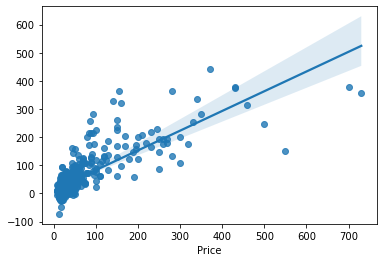

In [41]:
sns.regplot(y_test,y_pred)

In [43]:
print(f"r^2:{metrics.r2_score(y_test,y_pred)}")

r^2:0.6486242262883821
